# Data Science Aplicada à Área de Saúde

## Projeto Especial - Prevendo Despesas Médicas

Neste projeto seu trabalho é preparar o dataset para modelagem preditiva, quando iremos prever o custo de despesas médicas para uma amostra da população de pacientes de um hospital, considerando o hábito de fumar, idade, sexo, IMC e região. 

O dataset fornecido a você apresenta problemas que devem ser resolvidos. Você encontrará algumas perguntas que devem ser respondidas através de análise exploratória e visualização de dados.

Dicionário de Dados:
    
- idade: idade do paciente

- sexo: sexo do paciente (feminino, masculino)

- IMC: índice de massa corporal, usando a razão entre altura e peso (idealmente 18,5 a 24,9)

- filhos: número de filhos do paciente

- fumante: se fuma ou não

- região: a área residencial do paciente.

- custo_medico_anual: custo médico anual do paciente em uma clínica medica (variável alvo)

Para guiá-lo pelo projeto, deixamos comentários nas células abaixo com sugestões de atividades que deve ser realizadas. 

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Carregando o dataset
dataset = pd.read_csv('dados/custos_seguro.csv')

In [3]:
# Visualizando alguns registros
dataset.head() 

,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,19,feminino,27.90,0,yes,sudeste,16884.92400
1,18,masculino,33.77,1,no,sul,1725.55230
2,28,masculino,33.00,3,no,sul,4449.46200
3,33,masculino,NaN,0,no,nordeste,21984.47061
4,32,masculino,28.88,0,no,nordeste,3866.85520


In [4]:
# Visualizando os tipos de dados
dataset.dtypes

idade                   int64
sexo                   object
imc                   float64
filhos                  int64
fumante                object
regiao                 object
custo_medico_anual    float64
dtype: object

In [5]:
# Visualizando o total de linhas por coluna
dataset.count()

idade                 1338
sexo                  1338
imc                   1325
filhos                1338
fumante               1338
regiao                1338
custo_medico_anual    1338
dtype: int64

In [6]:
# Verifique se há valores ausentes
missing_values = dataset.isnull().sum().sort_values(ascending = False)
missing_values

imc                   13
custo_medico_anual     0
regiao                 0
fumante                0
filhos                 0
sexo                   0
idade                  0
dtype: int64

In [7]:
# Checando percentual de valores missing
missing_values = missing_values[missing_values > 0]/dataset.shape[0] 
print(f'{missing_values * 100} %')

imc    0.971599
dtype: float64 %


In [8]:
# Função para o Replace das linhas vazias
def impute_media(df):
    return df.fillna(df.mean())

In [9]:
# Removendo valores missing
dataset.imc = dataset['imc'].transform(impute_media)

In [10]:
# Verifique se há valores ausentes
missing_values = dataset.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/dataset.shape[0] 
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [11]:
# Convertendo todas as variáveis para o tipo inteiro a fim de calcular as correlações
from sklearn.preprocessing import LabelEncoder

dataset_transformado = dataset.apply(LabelEncoder().fit_transform)

In [12]:
# Visualizando os tipos de dados
dataset_transformado.dtypes

idade                 int64
sexo                  int64
imc                   int64
filhos                int64
fumante               int64
regiao                int64
custo_medico_anual    int64
dtype: object

In [13]:
dataset_transformado.head()

,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,1,0,197,0,1,2,1005
1,0,1,351,1,0,3,57
2,10,1,332,3,0,3,306
3,15,1,272,0,0,0,1097
4,14,1,223,0,0,0,254


## Quais variáveis tem maior correlação com o custo_medico_anual?

Construa um heatmap para mostrar suas conclusões.

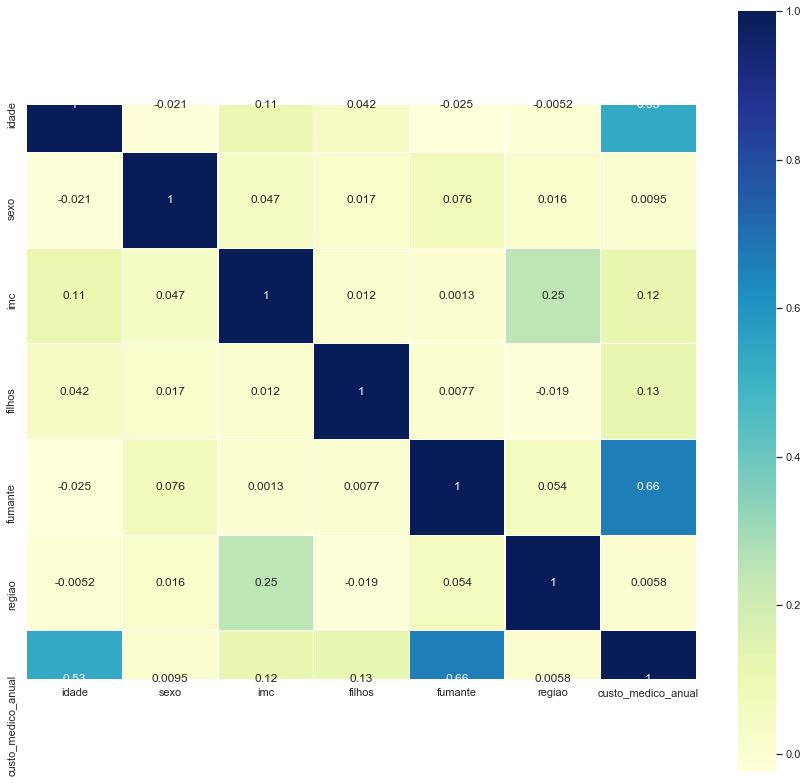

In [14]:
# Solução com Seaborn

# Definindo propriedades do Seaborn
sns.set(color_codes = True)

# Definindo área de platagem
plt.figure(figsize = (15, 14))

# Criando o heatmap
sns.heatmap(dataset_transformado.astype(float).corr(), 
            linewidths = 0.1, 
            square = True, 
            linecolor = 'white', 
            annot = True,
            cmap = "YlGnBu")
plt.show()

## Entre fumantes e não fumantes, qual grupo tem maior custo_medico_anual?

Dica: Um facetgrid do Seaborn com dois plots univariados (de uma única variável com dois valores), ajuda a visualizar a resposta.

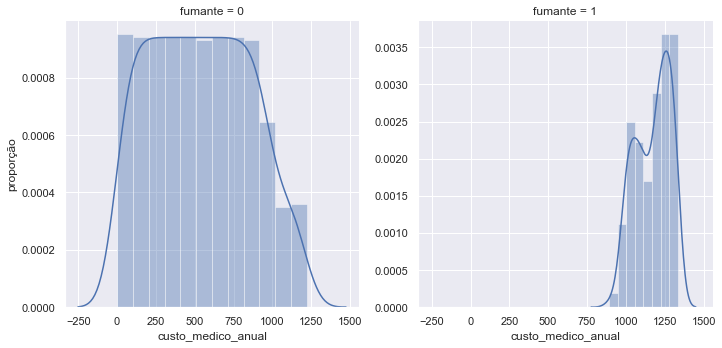

In [15]:
# Solução com Seaborn
grafico = sns.FacetGrid(dataset_transformado, col = "fumante", height = 5, sharey = False, sharex = True)
grafico.map(sns.distplot, "custo_medico_anual", color = 'b');
grafico.set_axis_labels("custo_medico_anual", "proporção");

## Qual faixa etária apresenta maior custo_medico_anual?

Construa uma visualização para suportar suas conclusões.

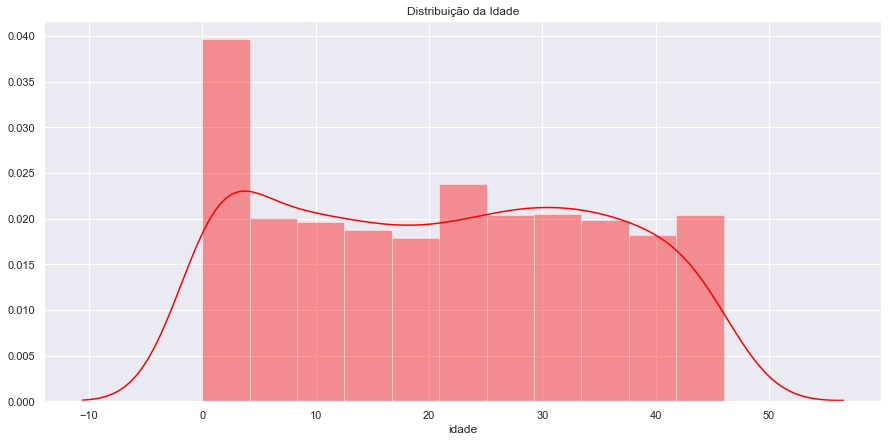

In [16]:
# Solução com Seaborn
plt.figure(figsize = (15,7))
plt.title("Distribuição da Idade")
ax = sns.distplot(dataset_transformado["idade"], color = 'red')

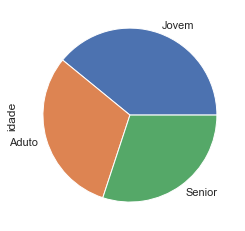

In [17]:
# Visualizando com Pie Chart a partir do dataframe
dataset_transformado["idade"].value_counts(bins = 3).plot(kind = 'pie', labels = ['Jovem', 'Aduto', 'Senior'])

## A proporção de fumantes por sexo é semelhante ou precisamos balancear esses dados?

Construa uma visualização para suportar suas conclusões.

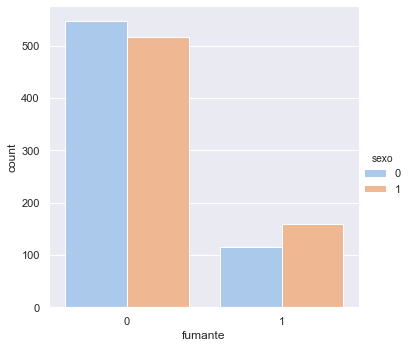

In [18]:
# Solução com Seaborn
sns.catplot(x = "fumante", kind = "count", hue = 'sexo', data = dataset_transformado, palette = 'pastel');
plt.show()

## À medida que a idade do paciente aumenta o que acontece com o custo_medico_anual? Há diferença entre fumantes e não fumantes?

Construa uma visualização para suportar suas conclusões. A função lmplot do Seaborn pode responder as duas perguntas com facilidade.

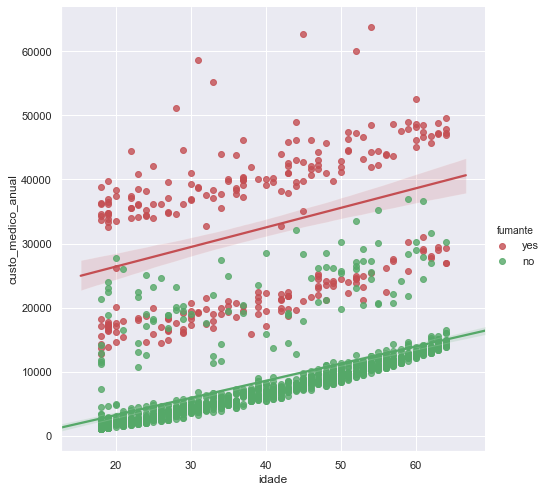

In [19]:
# Solução com Seaborn e Regressão Linear
sns.lmplot(x = "idade", y = "custo_medico_anual", hue = "fumante", data = dataset, palette = dict(yes = "r", no = "g"), height = 7)
plt.show()

## Construção do Modelo Preditivo

### Preparação dos Dados

Para este projeto, nossa variável target é um valor numérico (custo_medico_anual) e usaremos regressão para construir o modelo preditivo. Algumas transformações nos dados serão necessárias.

A função `pandas.get_dummies` converte os vetores de características categóricas em uma matriz vetorial com valores booleanos de uns e zeros. Isso será mais útil, pois nosso regressor tratará as entradas como números.

Aqui está um exemplo de como funciona:

$\vec{b}=\beta \vec{x}$

Observe como a matriz de variáveis dummies é representada para o recurso categórico de fumante:

$$\begin{pmatrix}\text{fumante_yes}\\ \text{fumante_no}\\ \text{fumante_no}\\ \vdots  \end{pmatrix}=\begin{bmatrix}
    1 & 0 \\
    0 & 1\\
    0 & 1\\
    \vdots & \vdots \\
    \end{bmatrix} \; 
    \begin{pmatrix}\text{fumante_yes} \\  \text{fumante_no} \\ \end{pmatrix}$$

In [20]:
# Dados após a fase de pré-processamento nos itens anteriores
dataset.head()

,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,19,feminino,27.900000,0,yes,sudeste,16884.92400
1,18,masculino,33.770000,1,no,sul,1725.55230
2,28,masculino,33.000000,3,no,sul,4449.46200
3,33,masculino,30.693019,0,no,nordeste,21984.47061
4,32,masculino,28.880000,0,no,nordeste,3866.85520


In [21]:
# Prepara as variáveis dummy (converte variáveis categóricas para representações numéricas com Label Encoding)
dataset = pd.get_dummies(dataset)
dataset.head()

,idade,imc,filhos,custo_medico_anual,sexo_feminino,sexo_masculino,fumante_no,fumante_yes,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
0,19,27.900000,0,16884.92400,1,0,0,1,0,0,1,0
1,18,33.770000,1,1725.55230,0,1,1,0,0,0,0,1
2,28,33.000000,3,4449.46200,0,1,1,0,0,0,0,1
3,33,30.693019,0,21984.47061,0,1,1,0,1,0,0,0
4,32,28.880000,0,3866.85520,0,1,1,0,1,0,0,0


In [22]:
# Divide os dados em x e y
X = dataset.drop(columns = ['custo_medico_anual'])
y = dataset['custo_medico_anual']

In [23]:
# Divide os dados em treino e teste

# Importa a função
from sklearn.model_selection import train_test_split

# Aplica a função com 10% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [24]:
# Cria a primeira versão do modelo de regressão linear

# Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Cria o modelo e treina com os dados de teste
lr = LinearRegression().fit(X_train, y_train)

# Previsões nos dados de treino
lr_train_pred = lr.predict(X_train)

# Previsões nos dados de teste
lr_test_pred = lr.predict(X_test)

# Calcula as métricas
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)

# Imprime o MSE (Mean Squared Error)
print('MSE nos dados de treino: {:.5}, MSE nos dados de teste: {:.5}'.format(lr_train_mse, lr_test_mse))

# Imprime o RMSE (Root Mean Squared Error)
print('RMSE nos dados de treino: {:.5}, RMSE nos dados de teste: {:.5}'.format(
    np.sqrt(np.absolute(lr_train_mse)), 
    np.sqrt(np.absolute(lr_train_mse))))
  
# Coeficiente R2
print('R2 nos dados de treino: {:.5}, R2 nos dados de teste: {:.5}'.format(
    r2_score(y_train, lr_train_pred),
    r2_score(y_test, lr_test_pred)))

MSE nos dados de treino: 3.6915e+07, MSE nos dados de teste: 3.2604e+07
RMSE nos dados de treino: 6075.8, RMSE nos dados de teste: 6075.8
R2 nos dados de treino: 0.74968, R2 nos dados de teste: 0.76367


In [25]:
# Testando outro algoritmo (Método Ensemble)

# Import
from sklearn.ensemble import RandomForestRegressor

# Cria e treina o modelo
rfr = RandomForestRegressor(n_estimators = 50).fit(X_train, y_train)

# Previsões em treino e teste
rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)

# Calcula as métricas em treino e meste
rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)

# Imprime o MSE (Mean Squared Error)
print('MSE nos dados de treino: {:.5}, MSE nos dados de teste: {:.5}'.format(rfr_train_mse, rfr_test_mse))

# Imprime o RMSE (Root Mean Squared Error)
print('RMSE nos dados de treino: {:.5}, RMSE nos dados de teste: {:.5}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
    
# Coeficiente R2
print('R2 nos dados de treino: {:.5}, R2 nos dados de teste: {:.5}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

MSE nos dados de treino: 3.4774e+06, MSE nos dados de teste: 2.4718e+07
RMSE nos dados de treino: 1864.8, RMSE nos dados de teste: 1864.8
R2 nos dados de treino: 0.97642, R2 nos dados de teste: 0.82083


Esta é uma previsão decente, podemos assumir que o RandomForest apresenta um melhor resultado com uma pontuação R2 de 97% nos dados de treinamento e 82% nos dados de teste (nunca vistos antes). Ele também tem o menor valor RMSE.

# Fim